# 用户在一家CD网站上的消费行为分析

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# header   用户id     购买日期    购买商品数       消费金额
columns = ["user_id","order_dt","order_products","order_amount"]
data = pd.read_table("C:/Users/Java02-张凌云/Desktop/CDNOW_master.txt",names=columns,sep="\s+")

In [7]:
data.head()  

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [8]:
# 对数据的描述统计
data.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [9]:
# 大部分订单只消费了少量商品(平均2.4个)
# 用户的消费金额比较稳定，平均消费35元，中位数在35元

In [10]:
# 调整购买日期格式
data["order_dt"] = pd.to_datetime(data.order_dt,format="%Y%m%d")

# 延伸一条字段month，方便后来处理
data["month"] = data.order_dt.values.astype('datetime64[M]')

In [11]:
data

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


## 进行用户消费趋势的分析(按月份)
- 1.每月的消费总金额 
- 2.每月的消费次数
- 3.每月的产品购买量
- 4.每月的消费人数

In [12]:
grouped_month = data.groupby("month")
order_month_amount = grouped_month.order_amount.sum()
order_month_amount.head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

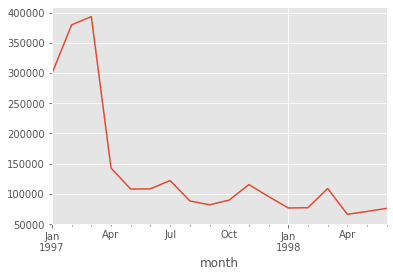

In [13]:
# 可视化总金额数据
# 可视化显示在页面
%matplotlib inline
# 更改设计风格,折线图
plt.style.use("ggplot")
order_month_amount.plot() 

- 由图可知，消费金额在前三个月达到了最高峰，后来消费金额较为稳定，且有下降趋势

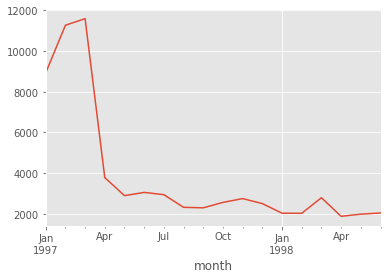

In [14]:
# 
grouped_month.user_id.count().plot()

- 前三个月消费***订单数***在10000左右，后续的平均消费人数为2500人

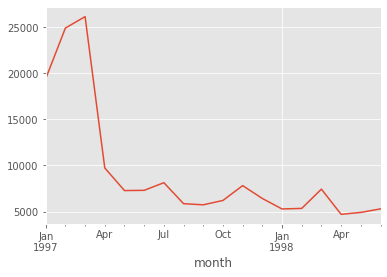

In [15]:
# 每月消费的总产品数
grouped_month.order_products.sum().plot()

- 前三个月的消费***产品数***达到最高

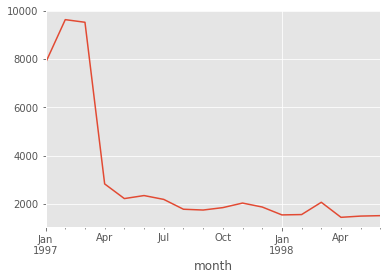

In [16]:
# 每月的消费人数  去重操作
data.groupby("month").user_id.apply(lambda x:len(x.drop_duplicates())).plot()

- 每月消费人数低于每月消费次数，但差异不大
- 前三个月每月的消费人数在8000-10000之间，后续月份，平均消费人数不到2000人

In [17]:
# 也可以通过透视方法，直接得出每个月的数据
data.pivot_table(index = "month",
                 values = ["order_products","order_amount","user_id"],
                 aggfunc = {
                     "order_products":"sum",
                     "order_amount":"sum",
                     "user_id":"count"
                 }).head()

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895


## 用户个体消费分析
- 用户消费金额，消费次数的描述统计
- 用户消费金额和消费的散点图
- 用户消费金额的分布图
- 用户累计消费金额占比例

In [18]:
grouped_user = data.groupby("user_id")

In [19]:
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


- 用户平均购买了7张CD，但是中位数只有3，说明小部分用户购买了大量的CD
- 用户平均消费了106元，中位值是43，判断同上，有极值干扰
- 小部分用户占了消费的大头

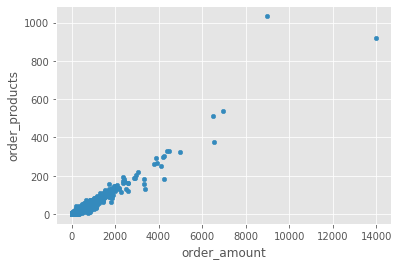

In [20]:
# 使用散点图显示
grouped_user.sum().plot.scatter(x = "order_amount",y="order_products")

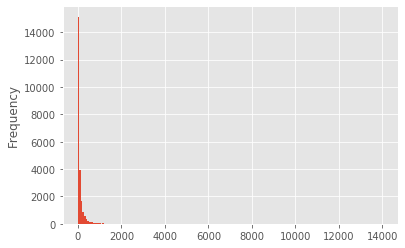

In [21]:
# 使用直方图显示  200份
grouped_user.sum().order_amount.plot.hist(bins = 200)

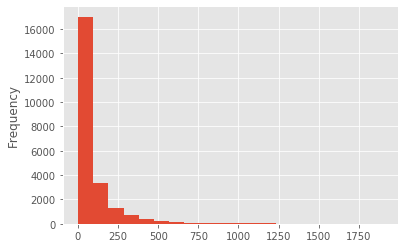

In [22]:
# 过滤
grouped_user.sum().query("order_products < 100").order_amount.plot.hist(bins = 20)

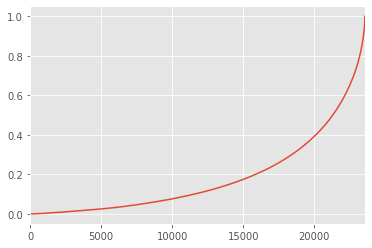

In [23]:
user_cumsum = grouped_user.sum().sort_values("order_amount").apply(lambda x:x.cumsum()/x.sum())
user_cumsum.reset_index().order_amount.plot()

- 按消费金额进行排序，由图可知50%的用户仅仅贡献了15%的消费额度，而排名5000前的用户就贡献了60%的消费额

## 用户消费行为
- 用户第一次消费(首购)
- 用户最后一次消费
- 新老用户消费比
  - 多少用户只消费了一次
  - 每月的新客占比

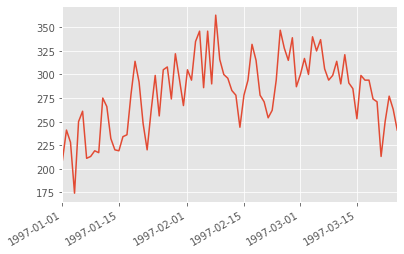

In [24]:
# 用户第一次消费
grouped_user.min().order_dt.value_counts().plot()

- 用户第一次购买分布，集中在前三个月
- 其中，在2月11日至2月25日有一次很大的波动

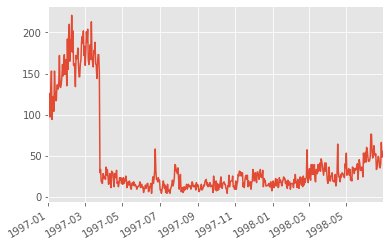

In [25]:
grouped_user.max().order_dt.value_counts().plot()

- 用户最后一次购买的分布比第一次分布广
- 大部分最后一次购买，集中在前三个月，说明有很多用户购买了最后一次就不在购买了
- 随着时间的推延，最后一次购买数也在递增，消费呈现六十上升的情况

In [26]:
# 求出用户第一次消费和最后一次消费的时间 比较
user_life = grouped_user.order_dt.agg(["min","max"])
user_life.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


In [27]:
(user_life["min"] == user_life["max"]).value_counts()

True     12054
False    11516
dtype: int64

- 满足条件的为12054，所以用户群体只消费一次的占50%左右

In [28]:
# 每个用户消费的信息
rfm = data.pivot_table(index = "user_id",
                     values = ["order_products","order_amount","order_dt"],
                     aggfunc = {
                         "order_dt":"max",
                         "order_amount":"sum",
                         "order_products":"sum"
                     })
rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [29]:
# 转化过程
# RFM 模型
rfm["R"] = -(rfm.order_dt - rfm.order_dt.max()) / np.timedelta64(1,"D")
rfm.rename(columns = {"order_products":"F","order_amount":"M"},inplace = True)

In [30]:
def rfm_func(x):
    level = x.apply(lambda x:"1" if x > 1 else "0")
    label = level.R + level.F + level.M
    d = {
        "111":"重要价值客户",
        "011":"重要保持客户",
        "101":"重要发展客户",
        "001":"重要挽留客户",
        "110":"一般价值客户",
        "010":"一般保持客户",
        "100":"一般发展客户",
        "000":"一般挽留客户"
    }
    result = d[label]
    return result
rfm["label"] = rfm[["R","F","M"]].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)

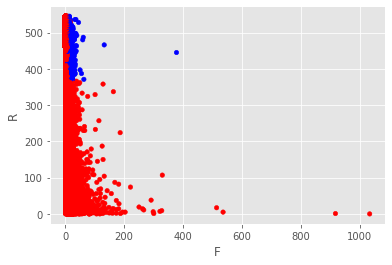

In [31]:
rfm.loc[rfm.label == "重要价值客户","color"] = "b"
rfm.loc[~(rfm.label == "重要价值客户"),"color"] = "r"
rfm.plot.scatter("F","R",c = rfm.color)

In [32]:
# 用户消费数据显示
rfm.groupby("label").sum()

,M,F,R
label,,,
一般价值客户,1767.11,182,8512.0
一般保持客户,5100.77,492,7782.0
一般发展客户,445233.28,29915,6983699.0
一般挽留客户,215075.77,15428,621894.0
重要价值客户,147180.09,9849,286676.0
重要保持客户,1555586.51,105509,476502.0
重要发展客户,49905.80,2322,174340.0
重要挽留客户,80466.30,4184,96009.0


In [33]:
# 进行数据同透视
pivoted_counts = data.pivot_table(index = "user_id",
                               columns = "month",
                               values = "order_dt",
                                aggfunc = "count"
                               ).fillna(0)

pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# 有一种情况是在后几个月份才开始注册的，前几月没有消费但是为也为0
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.tail()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# 过滤操作
def active_status(data):
    status = []
    for i in range(18):
        #本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == "unreg":
                    status.append("unreg")
                else:
                    status.append("unactive")
            else:
                status.append("unreg")
        # 本月没有消费   
        else:
            if len(status) == 0:
                status.append("new")
            else:
                if status[i-1] == "unactive":
                    status.append("return")
                elif status[i-1] == "unreg":
                    status.append("new")
                else:
                    status.append("active")
    return status

- 若本月没有消费
  - 若之前未注册，则依旧未注册
  - 若之前有消费，则为用户流失
  - 其它的情况，则为未注册
- 若本月有消费
  - 若第一次消费，则为新用户
  - 若之前有过消费，上个月不活跃，则为用户回流
  - 如果上个月未注册，则为新用户
  - 其他情况下，则为一直活跃用户

In [55]:
purchase_stats = df_purchase.apply(active_status,axis=1)
purchase_stats.head(5)

user_id
1    [new, unactive, unactive, unactive, unactive, ...
2    [new, unactive, unactive, unactive, unactive, ...
3    [new, unactive, return, active, unactive, unac...
4    [new, unactive, unactive, unactive, unactive, ...
5    [new, active, unactive, return, active, active...
dtype: object

In [45]:
purchase_stats_ct = purchase_stats.replace("unreg",np.NaN).apply(lambda x:pd.value_counts(x))
purchase_stats_ct

,unactive,new,return,active,unreg
user_id,,,,,
1,17.0,1.0,NaN,NaN,NaN
2,17.0,1.0,NaN,NaN,NaN
3,13.0,1.0,3.0,1.0,NaN
4,15.0,1.0,2.0,NaN,NaN
5,9.0,1.0,3.0,5.0,NaN
...,...,...,...,...,...
23566,15.0,1.0,NaN,NaN,2.0
23567,15.0,1.0,NaN,NaN,2.0
23568,14.0,1.0,NaN,1.0,2.0


In [46]:
 purchase_stats_ct.fillna(0).T.apply(lambda x:x/x.sum(),axis = 1)

user_id,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
unactive,0.000049,0.000049,0.000038,0.000043,0.000026,0.000049,0.000043,0.000032,0.000043,0.000049,...,0.000038,0.000043,0.000040,0.000038,0.000043,0.000043,0.000043,0.000040,0.000043,0.000043
new,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,...,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042
return,0.000000,0.000000,0.000158,0.000106,0.000158,0.000000,0.000106,0.000158,0.000106,0.000000,...,0.000106,0.000000,0.000053,0.000106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
active,0.000000,0.000000,0.000078,0.000000,0.000389,0.000000,0.000000,0.000233,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000078,0.000000,0.000000
unreg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000087,0.000087,0.000087,0.000087,0.000087,0.000087,0.000087,0.000087,0.000087,0.000087


In [56]:
user_life["max"] - user_life["min"]

user_id
1         0 days
2         0 days
3       511 days
4       345 days
5       367 days
          ...   
23566     0 days
23567     0 days
23568    28 days
23569     0 days
23570     1 days
Length: 23570, dtype: timedelta64[ns]

- 用户第一次消费到最后一次消费，之间的时间间隔

## 复购率和回购率分析
- 复购率
  - 一般月内，购买多次的用户占比
- 回购率
  - 之前购买过的用户在某一时期内的再次购买占比

In [59]:
pivoted_counts.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# 复购率
purchase_r = pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
purchase_r.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


- 得出的结果为:
    - 0 代表之前消费过，但现在没有购买，1代表本月就已经消费过

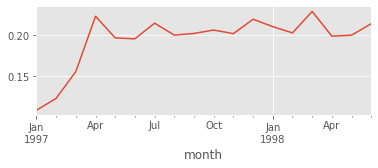

In [63]:
(purchase_r.sum() / purchase_r.count()).plot(figsize = (6,2))

- 复购率保持在20%左右，前三个月因为有大量新用户涌入，但是只购买了一次，所以导致复购率很低

In [65]:
# 计算回购率
df_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


- 1代表这个月消费过，0代表没有消费过

In [69]:
def purchase_back(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

In [70]:
purchase_b = df_purchase.apply(purchase_back,axis = 1)
purchase_b.head()

user_id
1    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
2    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
3    [0, nan, 1, 0, nan, nan, nan, nan, nan, nan, 0...
4    [0, nan, nan, nan, nan, nan, nan, 0, nan, nan,...
5    [1, 0, nan, 1, 1, 1, 0, nan, 0, nan, nan, 1, 0...
dtype: object

In [86]:
da1 = np.array(purchase_b)
da1

array([list([0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       list([0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       list([0, nan, 1, 0, nan, nan, nan, nan, nan, nan, 0, nan, nan, nan, nan, nan, 0, nan]),
       ...,
       list([nan, nan, 1, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       list([nan, nan, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       list([nan, nan, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])],
      dtype=object)

In [87]:
# 将数组转为数据框
da = pd.DataFrame(da1)
da

,0
0,"[0, nan, nan, nan, nan, nan, nan, nan, nan, na..."
1,"[0, nan, nan, nan, nan, nan, nan, nan, nan, na..."
2,"[0, nan, 1, 0, nan, nan, nan, nan, nan, nan, 0..."
3,"[0, nan, nan, nan, nan, nan, nan, 0, nan, nan,..."
4,"[1, 0, nan, 1, 1, 1, 0, nan, 0, nan, nan, 1, 0..."
...,...
23565,"[nan, nan, 0, nan, nan, nan, nan, nan, nan, na..."
23566,"[nan, nan, 0, nan, nan, nan, nan, nan, nan, na..."
23567,"[nan, nan, 1, 0, nan, nan, nan, nan, nan, nan,..."
23568,"[nan, nan, 0, nan, nan, nan, nan, nan, nan, na..."


In [84]:
# (da.sum() / da.count()).plot(figsize = (10,4))